# Task: What is your power level?

You are Vegeta, and you are using your scouter to measure the power levels of the Earth fighters during the Saiyan Saga. You are given an image `dbz.png` which shows all the fighters in a scene.

Overlay a heatmap on the image to visualize each character's power level.

The power levels for the characters are listed in the following table.

| Character | Power Level |
| --------- | ----------- |
| Chiaotzu  | 600         |
| Krillin   | 1500        |
| Yamcha    | 1400        |
| Tien      | 1800        |
| Goku      | Over 9000   |
| Piccolo   | 3500        |
| Gohan     | 981         |


# Imports packages and load image

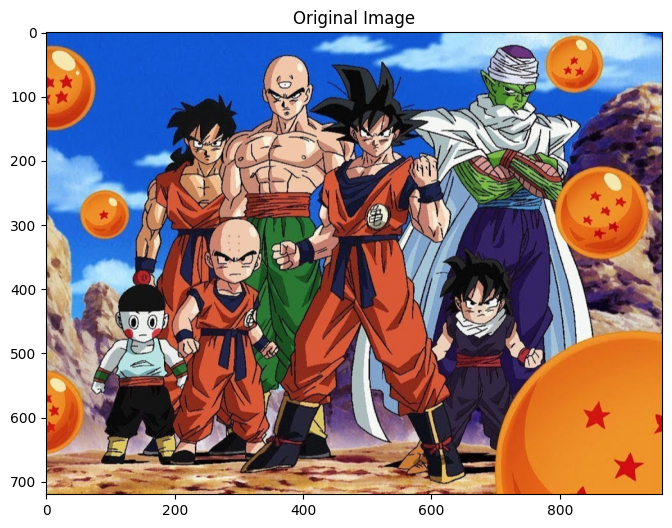

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img_path = "/content/dbz.jpg"
img = Image.open(img_path)
arr = np.array(img)

plt.figure(figsize=(10,6))
plt.imshow(arr)
plt.title("Original Image")
plt.show()

# Define character positions and power levels

In [ ]:
# Character rectangles: (x1, y1, x2, y2)
positions = np.array([
    [60, 380, 220, 600], # Chiaotzu
    [250, 280, 350, 500], # Krillin
    [150, 100, 300, 250], # Yamcha
    [310, 20, 420, 200], # Tien
    [450, 50, 600, 250], # Goku
    [650, 10, 850, 300], # Piccolo
    [600, 350, 750, 600], # Gohan
])

power_levels = np.array([
    600, # Chiaotzu
    1500, # Krillin
    1400, # Yamcha
    1800, # Tien
    9001, # Goku
    3500, # Piccolo
    981 # Gohan
])

# Apply scouter view

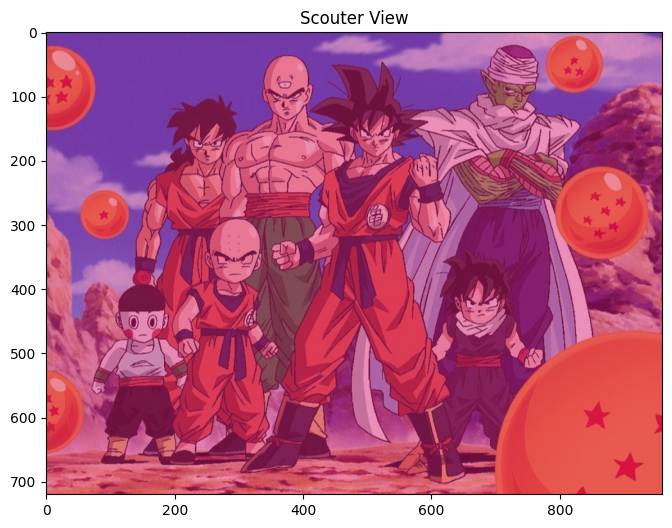

In [ ]:
overlay_color = np.array([225, 25, 120, 120], dtype=np.uint8)

if img.mode != 'RGBA':
    img = img.convert("RGBA")

overlay = Image.new("RGBA", img.size, tuple(overlay_color))
scouter_img = Image.alpha_composite(img, overlay)

scouter_arr = np.array(scouter_img)

plt.figure(figsize=(10,6))
plt.imshow(scouter_arr)
plt.title("Scouter View")
plt.show()

# Create power map

In [ ]:
height, width = arr.shape[:2]

power_map = np.zeros((height, width))

for (x1, y1, x2, y2), power in zip(positions, power_levels):
    power_map[y1:y2, x1:x2] = power

masked_map = np.ma.masked_where(power_map == 0, power_map)


# Plot final heatmap on top of scouter overlay

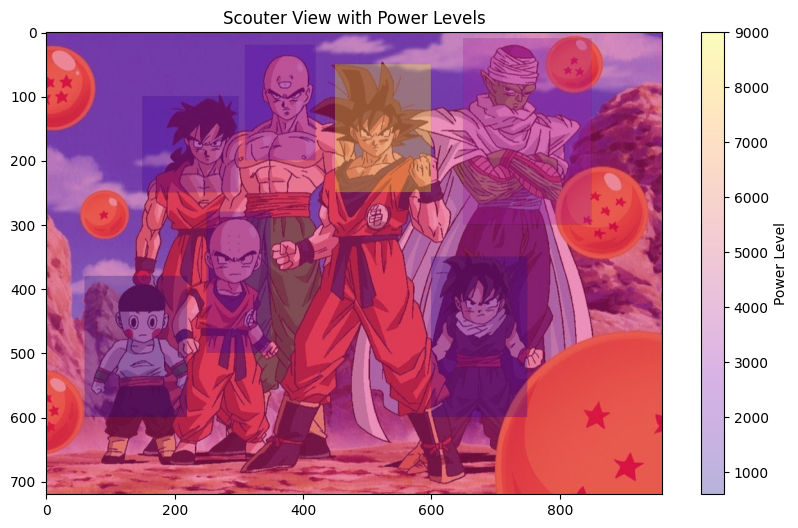

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(scouter_arr)
plt.imshow(masked_map, cmap="plasma", alpha=0.3)
plt.colorbar(label="Power Level")
plt.title("Scouter View with Power Levels")
plt.show()